### **Testing Hypotheses for Group Differences in a Rental Bike Sharing Dataset**
Joseph P. Martin

Phase 2, Module 6: Capstone 1: Experimental Design

Checkpoint 2: Run, Analyze, and Write Up Your Experiment Results

####**1. Introduction**
The data for this capstone project come from a rental bike sharing system in which riders pay to rent a simple bike for use on urban streets. Riders obtain a bike at one station, cycle, and then drop the bike off at another station. The data originally come from the Capital Bikeshare system in Washington, D.C. on all days in 2011 and 2012. According to Wikipedia, this was an early example of such a system in the United States. Capital Bikeshare launched in the later part of 2010, so these early data likely informed its ongoing growth. 

One reason this dataset is of interest is because of the expanding use of these systems, as the creators point out: “There are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles.” There is great interest in these systems “due to their important role in traffic, environmental and health issues.”

The dataset creators aggregated counts of riders by hour (hour.csv) and day (day.csv). There are other columns related to various measures of time and weather. Using file day.csv, rider counts will be grouped according to these other columns to determine if there are significant differences among groups. Does the average count of riders depend on group classification by aspects of time or weather?





####**2. Hypotheses**
The hypotheses to be tested are as follows:
1.   Working and Non-Working Days (Non-Holiday Weekday vs. Weekend or Holiday) 

>*   H₀: There is no significant difference between the average count of riders on working and non-working days.
>*   Hₐ: There is a significant difference between the average count of riders on working and non-working days.

2.   Day of the Week

>*   H₀: There is no significant difference among the average count of riders on different days of the week.
>*   Hₐ: There is a significant difference among the average count of riders on different days of the week.

3.   Season

>*   H₀: There is no significant difference among the average daily count of riders in the four seasons.
>*   Hₐ: There is a significant difference among the average daily count of riders in the four seasons.

4.   Weather Intensity (four possible groups)

>*   H₀: There is no significant difference among the average daily count of riders in the different weather intensity groups.
>*   Hₐ: There is a significant difference among the average daily count of riders in the different weather intensity groups.

####**3. Data**
The data were obtained from: https://www.kaggle.com/imakash3011/rental-bike-sharing and originally come from the Capital Bikeshare system in Washington, D.C. on all days in 2011 and 2012.

In file day.csv, the dataset creators aggregated counts of riders by day. These counts are broken out into “casual” and “registered” users. Columns related to time are date, year, month, hour, season, day of the week, and whether the day is or is not a holiday or is or is not a working day. Weather-related columns added by the dataset creators from freemeteo.com are weather intensity, temperature, sensed temperature, humidity, and wind speed.

In [ ]:
# set up environment
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [ ]:
# read in the dataset. storing this on github avoided authentication issue if stored on Google Drive. could not be read from Kaggle directly.
rbs_data_day = pd.read_csv('https://raw.githubusercontent.com/JosephMartin610/thinkful_data_science_flex/main/day.csv')

In [ ]:
# take an initial look at the day and hour datasets
print(rbs_data_day.shape)
rbs_data_day.info()
rbs_data_day.head()

# look at value ranges or unique values in day.csv
print('instant range: ', [rbs_data_day['instant'].min(), rbs_data_day['instant'].max()])
print('dteday range: ', [rbs_data_day['dteday'].min(), rbs_data_day['dteday'].max()])
print('dteday difference range: ', 
      [pd.to_datetime(rbs_data_day['dteday']).diff().min(), 
       pd.to_datetime(rbs_data_day['dteday']).diff().max()])
print('season unique: ', rbs_data_day['season'].unique())
print('yr unique: ', rbs_data_day['yr'].unique())
print('mnth unique: ', rbs_data_day['mnth'].unique())
print('holiday unique: ', rbs_data_day['holiday'].unique())
print('weekday unique: ', rbs_data_day['weekday'].unique())
print('workingday unique: ', rbs_data_day['workingday'].unique())
print('weathersit unique: ', rbs_data_day['weathersit'].unique())
print('temp range: ', [rbs_data_day['temp'].min(), rbs_data_day['temp'].max()])
print('atemp range: ', [rbs_data_day['atemp'].min(), rbs_data_day['atemp'].max()])
print('hum range: ', [rbs_data_day['hum'].min(), rbs_data_day['hum'].max()])
print('windspeed range: ', [rbs_data_day['windspeed'].min(), rbs_data_day['windspeed'].max()])
print('casual range: ', [rbs_data_day['casual'].min(), rbs_data_day['casual'].max()])
print('registered range: ', [rbs_data_day['registered'].min(), rbs_data_day['registered'].max()])
print('cnt range: ', [rbs_data_day['cnt'].min(), rbs_data_day['cnt'].max()])

(731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant range:  [1, 731]
dteday range:  ['2011-01-01', '2012-12-31']
dteday differe

Considering what is displayed above we determine the following:

There are are 731 rows, because there is one row for each day in the two-year period 2011 and 2012 (365+366=731). All 731 entries for all columns are non-null.

The columns are as specified in the Readme.txt file available on Kaggle.

The value ranges or unique values in the columns in day.csv are:

0: 'instant'    :	int64   (record index: 1 to 731)

1: 'dteday'     :	object  (each day (yyyy-mm-dd) in 2011 and 2012 for a total 
                            of 365 + 366 = 731 days)

2: 'season'     : int64   (2 = spring, 3 = summer, 4 = autumn, 1 = winter; **wrong in Readme.txt**)

3: 'yr'         : int64   (0 = 2011, 1 = 2012)

4: 'mnth'       : int64   (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

5: 'holiday'    : int64   (whether day is holiday or not: 0 or 1; extracted from http://dchr.dc.gov/page/holiday-schedule)

6: 'weekday'    : int64   (day of the week: 6, 0, 1, 2, 3, 4, 5; 0 = Sunday to 6 = Saturday)

7: 'workingday' : int64   (whether day is working day or not: 0 or 1; if day is neither weekend nor holiday is 1, otherwise is 0.)

8: 'weathersit' : int64   (weather worse with increase in number: 1, 2, 3; 1 = Clear, Few Clouds, Partly Cloudy, Partly Cloudy; 2 = Mist + Cloudy, Mist + Broken Clouds, Mist + Few clouds, Mist; 3 = Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds; 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog {4 does not occur})

9: 'temp'       : float64 (temperature: 0.0591 to 0.862 normalized by 41 degrees C)

10:	'atemp'     : float64 (temperature sensed: 0.079 to 0.841 normalized by 50 degrees C)

11:	'hum'       : float64 (humidity: 0.0000 to 0.9725 normalized by 100%)

12: 'windspeed' :	float64 (wind speed: 0.022 to 0.507 normalized by 67 m/s)

13: 'casual'    : int64   (count of casual users: 2 to 3410)

14: 'registered': int64   (count of registered users: 20 to 6946)

15:	'cnt'       : int64   (count of total users including both casual and registered: 22 to 8714)

In [ ]:
# remove the normalizations
temp_norm = 41
atemp_norm = 50
hum_norm = 100
windspeed_norm = 67
rbs_data_day['temp'] = rbs_data_day['temp'] * temp_norm
rbs_data_day['atemp'] = rbs_data_day['atemp'] * atemp_norm
rbs_data_day['hum'] = rbs_data_day['hum'] * hum_norm
rbs_data_day['windspeed'] = rbs_data_day['windspeed'] * windspeed_norm
print('temp range: ', [rbs_data_day['temp'].min(), rbs_data_day['temp'].max()])
print('atemp range: ', [rbs_data_day['atemp'].min(), rbs_data_day['atemp'].max()])
print('hum range: ', [rbs_data_day['hum'].min(), rbs_data_day['hum'].max()])
print('windspeed range: ', [rbs_data_day['windspeed'].min(), rbs_data_day['windspeed'].max()])

temp range:  [2.4243464, 35.328347]
atemp range:  [3.9534800000000003, 42.044799999999995]
hum range:  [0.0, 97.25]
windspeed range:  [1.5002439, 34.000021]


We now have these ranges:

9: 'temp'       : float64 (temperature: 2.42 to 35.33 degrees C)

10:	'atemp'     : float64 (temperature sensed: 3.95 to 42.04 degrees C)

11:	'hum'       : float64 (humidity: 0.00% to 97.25%)

12: 'windspeed' :	float64 (wind speed: 1.50 to 34.00 m/s)

Now consider the row counts for each of the groups that will be used for hypothesis testing. 

(Note: Counts here means row counts, not the rider counts.)

In [ ]:
# Working and Non-Working Days
print(rbs_data_day[['dteday']].groupby(rbs_data_day['workingday']).agg(['count']))

# Day of the Week
print(rbs_data_day[['dteday']].groupby(rbs_data_day['weekday']).agg(['count']))

# Season
print(rbs_data_day[['dteday']].groupby(rbs_data_day['season']).agg(['count']))

# Weather Intensity
print(rbs_data_day[['dteday']].groupby(rbs_data_day['weathersit']).agg(['count']))

           dteday
            count
workingday       
0             231
1             500
        dteday
         count
weekday       
0          105
1          105
2          104
3          104
4          104
5          104
6          105
       dteday
        count
season       
1         181
2         184
3         188
4         178
           dteday
            count
weathersit       
1             463
2             247
3              21


The counts for workingday are as expected with a rough ratio of 2 nonworking days to every 5 working (weekdays) with additional nonworking days being holidays. Day of the week counts are evenly distributed. Season counts are evenly distributed but there are small differences because calender years are offset from season endpoints. As expected, the least intense weather is the most common.

####**4. Methods**

While it is possible that some of the same individuals used a rental bike on different days, only overall counts are provided without identification of individual riders. Therefore, each group for each hypothesis will be considered independent.

#####**1. Working and Non-Working Days**

First, make dataframes grouped by workingday (1 = working day) and look at info: 

In [ ]:
rbs_data_day_wdy = rbs_data_day[(rbs_data_day['workingday'] == 1)]
rbs_data_day_wdn = rbs_data_day[(rbs_data_day['workingday'] == 0)]

print(rbs_data_day_wdy.info())
print(rbs_data_day_wdn.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     500 non-null    int64  
 1   dteday      500 non-null    object 
 2   season      500 non-null    int64  
 3   yr          500 non-null    int64  
 4   mnth        500 non-null    int64  
 5   holiday     500 non-null    int64  
 6   weekday     500 non-null    int64  
 7   workingday  500 non-null    int64  
 8   weathersit  500 non-null    int64  
 9   temp        500 non-null    float64
 10  atemp       500 non-null    float64
 11  hum         500 non-null    float64
 12  windspeed   500 non-null    float64
 13  casual      500 non-null    int64  
 14  registered  500 non-null    int64  
 15  cnt         500 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 66.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 729
Data columns (to

Next, determine whether or not the rider counts are distributed normally by looking at descriptive statistics skewness and kurtosis, test statistic(s), and plots of distribution.

Working Days:
DescribeResult(nobs=500, minmax=(22, 8362), mean=4584.82, variance=3528445.101803607, skewness=-0.07413712660849178, kurtosis=-0.7843506929893747)
(0.9765782356262207, 3.4888859090642654e-07)
KstestResult(statistic=1.0, pvalue=0.0)
Non-Working Days:
DescribeResult(nobs=231, minmax=(605, 8714), mean=4330.168831168831, variance=4211283.688763411, skewness=0.03850367498079588, kurtosis=-0.8856271219652991)
(0.9761089086532593, 0.0006035277037881315)
KstestResult(statistic=1.0, pvalue=0.0)


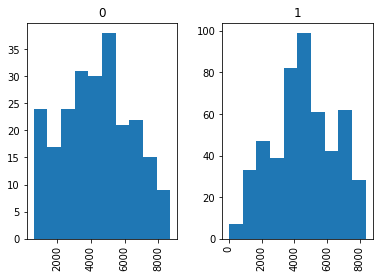

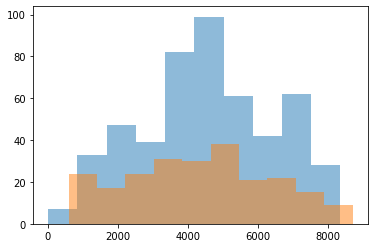

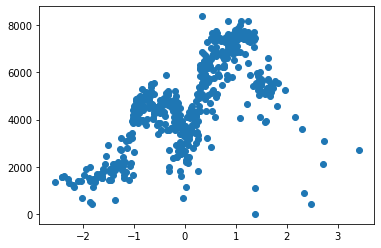

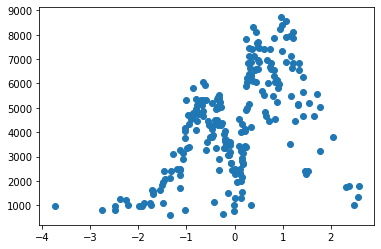

In [ ]:
# descriptive statistics 
# and Shapiro-Wilk (S-W) and Kolmogorov–Smirnov (K-S) tests
print('Working Days:')
print(stats.describe(rbs_data_day_wdy['cnt']))
print(stats.shapiro(rbs_data_day_wdy['cnt']))
print(stats.kstest(rbs_data_day_wdy['cnt'],'norm'))
print('Non-Working Days:')
print(stats.describe(rbs_data_day_wdn['cnt']))
print(stats.shapiro(rbs_data_day_wdn['cnt']))
print(stats.kstest(rbs_data_day_wdn['cnt'],'norm'))

# histograms
#   separate
rbs_data_day['cnt'].hist(by = rbs_data_day['workingday'])
plt.show()
#   together
plt.hist(rbs_data_day_wdy['cnt'], alpha = .5)
plt.hist(rbs_data_day_wdn['cnt'], alpha = .5)
plt.show()

# setup Q-Q plots
rbs_data_day_wdy_cnt = rbs_data_day_wdy['cnt']
rbs_data_day_wdn_cnt = rbs_data_day_wdn['cnt']
# sort the values in ascending order
rbs_data_day_wdy_cnt.sort_values()
rbs_data_day_wdn_cnt.sort_values()
# make a standard normally distributed variable with a matching length
# a mean of 0, and standard deviation of 1 to use as a comparison
norm_wdy = np.random.normal(0, 1, len(rbs_data_day_wdy_cnt))
norm_wdn = np.random.normal(0, 1, len(rbs_data_day_wdn_cnt))
# sort the values in ascending order
norm_wdy.sort()
norm_wdn.sort()
# plot wdy_cnt vs. norm in QQ plot
plt.plot(norm_wdy, rbs_data_day_wdy_cnt, "o")
plt.show()
# plot wdn_cnt vs. norm in QQ plot
plt.plot(norm_wdn, rbs_data_day_wdn_cnt, "o")
plt.show()

For both groups, skewness is very close to 0. The kurtosis for both groups is slightly negative (-0.78 and -0.89), so the distributions are slightly flatter than normal. Both skewness and kurtosis are within the +/-3 guidline limits for making a t-test acceptable for testing the difference between groups. However, if we look at the results of Shapiro-Wilk test, both groups have p-values much less than 0.05, indicating non-normality at the 95% confidence level. But the sample sizes of 500 and 231 may be too large for S-W, so the Kolmogorov–Smirnov test can be considered also. Both groups have p-values of 0.0, indicating non-normality as well. The histograms appear to show the data have some normal characteristics, but not others. The skewness and kurtosis values match with what is seen in the histograms. While there is some positive correlation in the Q-Q plots, the data are not convincingly normal. A non-parametric test should be used to assess if there is a significant difference between the two groups. The Kruskal-Wallis test will be used:

In [ ]:
# compute medians for reference
print(rbs_data_day_wdy_cnt.median())
print(rbs_data_day_wdn_cnt.median())
# use Kruskal-Wallis test
print(stats.kruskal(rbs_data_day_wdy_cnt, rbs_data_day_wdn_cnt))

4582.0
4459.0
KruskalResult(statistic=2.4362299663327818, pvalue=0.11856086731455766)


Because the p-value is > 0.05, we cannot reject the null hypothesis that the distributions of rider counts in the working day and non-working day groups are the same. To specfically consider the difference in medians between the two groups, Mood's median test can be used:

In [ ]:
# use Mood's median test
print(stats.median_test(rbs_data_day_wdy_cnt, rbs_data_day_wdn_cnt))

(0.8640102512241858, 0.3526188793079065, 4548.0, array([[256, 109],
       [244, 122]]))


Because the p-value of 0.35 is > 0.05, we cannot reject the null hypothesis that the medians of rider counts in the working day and non-working day groups are the same.



#####**2. Day of the Week**
First, make dataframes grouped by day of the week and look at info:

In [ ]:
rbs_data_day_Su = rbs_data_day[(rbs_data_day['weekday'] == 0)]
rbs_data_day_Mo = rbs_data_day[(rbs_data_day['weekday'] == 1)]
rbs_data_day_Tu = rbs_data_day[(rbs_data_day['weekday'] == 2)]
rbs_data_day_We = rbs_data_day[(rbs_data_day['weekday'] == 3)]
rbs_data_day_Th = rbs_data_day[(rbs_data_day['weekday'] == 4)]
rbs_data_day_Fr = rbs_data_day[(rbs_data_day['weekday'] == 5)]
rbs_data_day_Sa = rbs_data_day[(rbs_data_day['weekday'] == 6)]

print(rbs_data_day_Su.info())
print(rbs_data_day_Mo.info())
print(rbs_data_day_Tu.info())
print(rbs_data_day_We.info())
print(rbs_data_day_Th.info())
print(rbs_data_day_Fr.info())
print(rbs_data_day_Sa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     105 non-null    int64  
 1   dteday      105 non-null    object 
 2   season      105 non-null    int64  
 3   yr          105 non-null    int64  
 4   mnth        105 non-null    int64  
 5   holiday     105 non-null    int64  
 6   weekday     105 non-null    int64  
 7   workingday  105 non-null    int64  
 8   weathersit  105 non-null    int64  
 9   temp        105 non-null    float64
 10  atemp       105 non-null    float64
 11  hum         105 non-null    float64
 12  windspeed   105 non-null    float64
 13  casual      105 non-null    int64  
 14  registered  105 non-null    int64  
 15  cnt         105 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 13.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 2 to 730
Data columns (to

Next, determine whether or not the rider counts are distributed normally by looking at descriptive statistics skewness and kurtosis, test statistic(s), and plots of distribution.

Sundays:
DescribeResult(nobs=105, minmax=(605, 8227), mean=4228.828571428571, variance=3506243.6241758247, skewness=-0.0035507644629986066, kurtosis=-0.7612214896588694)
(0.9811584949493408, 0.141499862074852)
KstestResult(statistic=1.0, pvalue=0.0)
Mondays:
DescribeResult(nobs=105, minmax=(22, 7525), mean=4338.1238095238095, variance=3215114.4172161175, skewness=-0.20728950111658384, kurtosis=-0.7605490803955757)
(0.9723017811775208, 0.0267639197409153)
KstestResult(statistic=1.0, pvalue=0.0)
Tuesdays:
DescribeResult(nobs=104, minmax=(683, 7767), mean=4510.663461538462, variance=3337606.147778193, skewness=-0.2077970612626131, kurtosis=-0.7427892798848972)
(0.9646976590156555, 0.007120804395526648)
KstestResult(statistic=1.0, pvalue=0.0)
Wednesdays:
DescribeResult(nobs=104, minmax=(441, 8173), mean=4548.538461538462, variance=4153834.8334578043, skewness=-0.03531449576726751, kurtosis=-0.9530625925817611)
(0.9588786959648132, 0.002632882446050644)
KstestResult(statistic=1.0, pvalue=0.

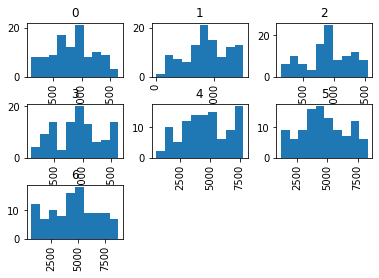

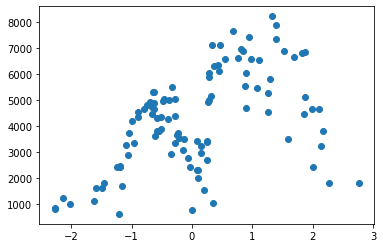

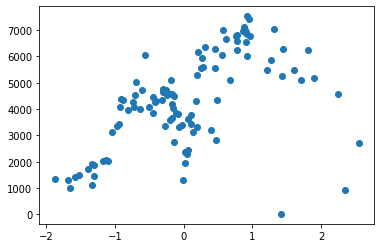

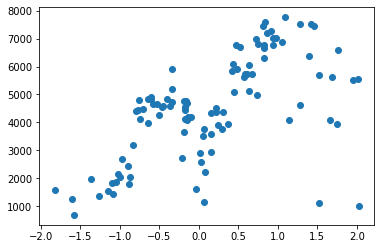

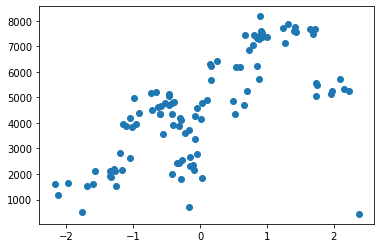

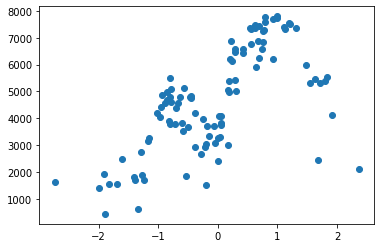

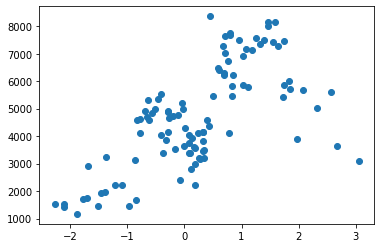

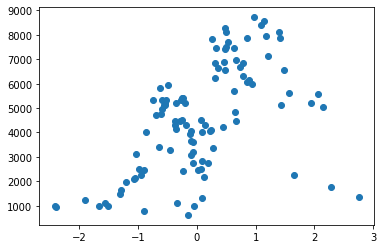

In [ ]:
# descriptive statistics
# and Shapiro-Wilk (S-W) and Kolmogorov–Smirnov (K-S) tests
print('Sundays:')
print(stats.describe(rbs_data_day_Su['cnt']))
print(stats.shapiro(rbs_data_day_Su['cnt']))
print(stats.kstest(rbs_data_day_Su['cnt'],'norm'))
print('Mondays:')
print(stats.describe(rbs_data_day_Mo['cnt']))
print(stats.shapiro(rbs_data_day_Mo['cnt']))
print(stats.kstest(rbs_data_day_Mo['cnt'],'norm'))
print('Tuesdays:')
print(stats.describe(rbs_data_day_Tu['cnt']))
print(stats.shapiro(rbs_data_day_Tu['cnt']))
print(stats.kstest(rbs_data_day_Tu['cnt'],'norm'))
print('Wednesdays:')
print(stats.describe(rbs_data_day_We['cnt']))
print(stats.shapiro(rbs_data_day_We['cnt']))
print(stats.kstest(rbs_data_day_We['cnt'],'norm'))
print('Thursdays:')
print(stats.describe(rbs_data_day_Th['cnt']))
print(stats.shapiro(rbs_data_day_Th['cnt']))
print(stats.kstest(rbs_data_day_Th['cnt'],'norm'))
print('Fridays:')
print(stats.describe(rbs_data_day_Fr['cnt']))
print(stats.shapiro(rbs_data_day_Fr['cnt']))
print(stats.kstest(rbs_data_day_Fr['cnt'],'norm'))
print('Saturdays:')
print(stats.describe(rbs_data_day_Sa['cnt']))
print(stats.shapiro(rbs_data_day_Sa['cnt']))
print(stats.kstest(rbs_data_day_Sa['cnt'],'norm'))

# histograms
#   separate
rbs_data_day['cnt'].hist(by = rbs_data_day['weekday'])
plt.show()

# setup Q-Q plots
rbs_data_day_Su_cnt = rbs_data_day_Su['cnt']
rbs_data_day_Mo_cnt = rbs_data_day_Mo['cnt']
rbs_data_day_Tu_cnt = rbs_data_day_Tu['cnt']
rbs_data_day_We_cnt = rbs_data_day_We['cnt']
rbs_data_day_Th_cnt = rbs_data_day_Th['cnt']
rbs_data_day_Fr_cnt = rbs_data_day_Fr['cnt']
rbs_data_day_Sa_cnt = rbs_data_day_Sa['cnt']
# sort the values in ascending order
rbs_data_day_Su_cnt.sort_values()
rbs_data_day_Mo_cnt.sort_values()
rbs_data_day_Tu_cnt.sort_values()
rbs_data_day_We_cnt.sort_values()
rbs_data_day_Th_cnt.sort_values()
rbs_data_day_Fr_cnt.sort_values()
rbs_data_day_Sa_cnt.sort_values()
# make a standard normally distributed variable with a matching length
# a mean of 0, and standard deviation of 1 to use as a comparison
norm_Su = np.random.normal(0, 1, len(rbs_data_day_Su_cnt))
norm_Mo = np.random.normal(0, 1, len(rbs_data_day_Mo_cnt))
norm_Tu = np.random.normal(0, 1, len(rbs_data_day_Tu_cnt))
norm_We = np.random.normal(0, 1, len(rbs_data_day_We_cnt))
norm_Th = np.random.normal(0, 1, len(rbs_data_day_Th_cnt))
norm_Fr = np.random.normal(0, 1, len(rbs_data_day_Fr_cnt))
norm_Sa = np.random.normal(0, 1, len(rbs_data_day_Sa_cnt))
# sort the values in ascending order
norm_Su.sort()
norm_Mo.sort()
norm_Tu.sort()
norm_We.sort()
norm_Th.sort()
norm_Fr.sort()
norm_Sa.sort()
# plot cnts vs. norms in QQ plots
plt.plot(norm_Su, rbs_data_day_Su_cnt, "o")
plt.show()
plt.plot(norm_Mo, rbs_data_day_Mo_cnt, "o")
plt.show()
plt.plot(norm_Tu, rbs_data_day_Tu_cnt, "o")
plt.show()
plt.plot(norm_We, rbs_data_day_We_cnt, "o")
plt.show()
plt.plot(norm_Th, rbs_data_day_Th_cnt, "o")
plt.show()
plt.plot(norm_Fr, rbs_data_day_Fr_cnt, "o")
plt.show()
plt.plot(norm_Sa, rbs_data_day_Sa_cnt, "o")
plt.show()

For all groups, skewness is close to 0, ranging from -0.21 to 0.10. The kurtosis for all groups is slightly negative (-0.97 to -0.74), so the distributions are slightly flatter than normal. Both skewness and kurtosis are within the +/-3 guidline limits for making a t-test or ANOVA acceptable for testing the difference between or among groups. However, if we look at the results of Shapiro-Wilk test, most groups have p-values less than 0.05, indicating non-normality at the 95% confidence level. Sunday is the only day with a p-value greater than 0.05. But the sample sizes of 104 or 105 may be too large for S-W, so the Kolmogorov–Smirnov test can be considered also. All groups have p-values of 0.0, indicating non-normality as well. The histograms do not look very normal, although Sunday (0) and Friday (5) look more normal than Thursday (4). The skewness and kurtosis values match with what is seen in the histograms. While there is some positive correlation in the Q-Q plots, the data are not convincingly normal. A non-parametric test should be used to assess if there is a significant difference among the groups. The Kruskal-Wallis test will be used:

In [ ]:
# compute medians for reference
print(rbs_data_day_Su_cnt.median())
print(rbs_data_day_Mo_cnt.median())
print(rbs_data_day_Tu_cnt.median())
print(rbs_data_day_We_cnt.median())
print(rbs_data_day_Th_cnt.median())
print(rbs_data_day_Fr_cnt.median())
print(rbs_data_day_Sa_cnt.median())

# use Kruskal-Wallis test
print(stats.kruskal(rbs_data_day_Su_cnt, rbs_data_day_Mo_cnt, rbs_data_day_Tu_cnt, 
              rbs_data_day_We_cnt, rbs_data_day_Th_cnt, rbs_data_day_Fr_cnt, 
              rbs_data_day_Sa_cnt))

4334.0
4359.0
4576.5
4642.5
4721.0
4601.5
4521.0
KruskalResult(statistic=4.3374571794145975, pvalue=0.6311103402212379)


Because the p-value is > 0.05, we cannot reject the null hypothesis that the 
distributions of rider counts in the different day groups are the same. To specfically consider the difference in medians among the groups, Mood's median test can be used:

In [ ]:
# use Mood's median test
print(stats.median_test(rbs_data_day_Su_cnt, rbs_data_day_Mo_cnt, rbs_data_day_Tu_cnt, 
                  rbs_data_day_We_cnt, rbs_data_day_Th_cnt, rbs_data_day_Fr_cnt, 
                  rbs_data_day_Sa_cnt))

(3.2381985104498057, 0.7784111476143536, 4548.0, array([[49, 46, 53, 54, 56, 55, 52],
       [56, 59, 51, 50, 48, 49, 53]]))


Because the p-value of 0.78 is > 0.05, we cannot reject the null hypothesis that the medians of rider counts in the different day groups are the same.

#####**3. Season**
First, make dataframes grouped by season and look at info:

In [ ]:
rbs_data_day_sp = rbs_data_day[(rbs_data_day['season'] == 2)]
rbs_data_day_sm = rbs_data_day[(rbs_data_day['season'] == 3)]
rbs_data_day_au = rbs_data_day[(rbs_data_day['season'] == 4)]
rbs_data_day_wi = rbs_data_day[(rbs_data_day['season'] == 1)]

print(rbs_data_day_sp.info())
print(rbs_data_day_sm.info())
print(rbs_data_day_au.info())
print(rbs_data_day_wi.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 79 to 536
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     184 non-null    int64  
 1   dteday      184 non-null    object 
 2   season      184 non-null    int64  
 3   yr          184 non-null    int64  
 4   mnth        184 non-null    int64  
 5   holiday     184 non-null    int64  
 6   weekday     184 non-null    int64  
 7   workingday  184 non-null    int64  
 8   weathersit  184 non-null    int64  
 9   temp        184 non-null    float64
 10  atemp       184 non-null    float64
 11  hum         184 non-null    float64
 12  windspeed   184 non-null    float64
 13  casual      184 non-null    int64  
 14  registered  184 non-null    int64  
 15  cnt         184 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 24.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 171 to 630
Data columns 

Next, determine whether or not the rider counts are distributed normally by looking at descriptive statistics skewness and kurtosis, test statistic(s), and plots of distribution.

Spring:
DescribeResult(nobs=184, minmax=(795, 8362), mean=4992.33152173913, variance=2876338.780203136, skewness=-0.26146056225834585, kurtosis=-0.6095494374692798)
(0.9793386459350586, 0.0079073840752244)
KstestResult(statistic=1.0, pvalue=0.0)
Summer:
DescribeResult(nobs=188, minmax=(1115, 8714), mean=5644.303191489362, variance=2131017.1535726474, skewness=-0.09546400140063158, kurtosis=-0.580689108437674)
(0.9631569981575012, 7.678098336327821e-05)
KstestResult(statistic=1.0, pvalue=0.0)
Autumn:
DescribeResult(nobs=178, minmax=(22, 8555), mean=4728.162921348315, variance=2888692.0354535645, skewness=0.09174117170423225, kurtosis=-0.2860535078645601)
(0.9814850687980652, 0.018196173012256622)
KstestResult(statistic=1.0, pvalue=0.0)
Winter:
DescribeResult(nobs=181, minmax=(431, 7836), mean=2604.1325966850827, variance=1959837.9378759973, skewness=0.8779704347139162, kurtosis=0.4714852224240822)
(0.9380476474761963, 4.983239705325104e-07)
KstestResult(statistic=1.0, pvalue=0.0)


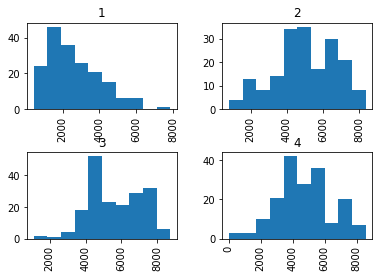

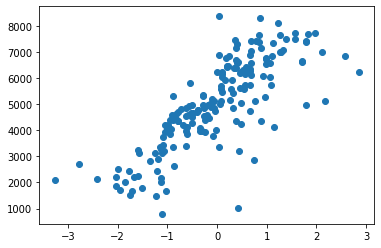

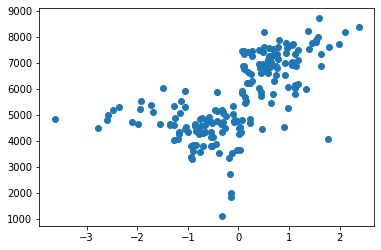

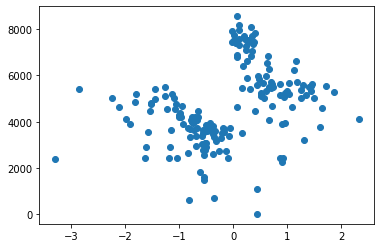

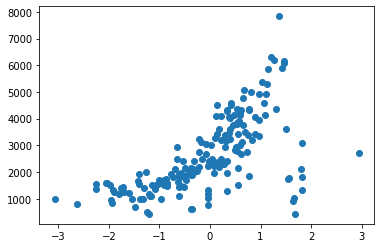

In [ ]:
# descriptive statistics
# and Shapiro-Wilk (S-W) and Kolmogorov–Smirnov (K-S) tests
print('Spring:')
print(stats.describe(rbs_data_day_sp['cnt']))
print(stats.shapiro(rbs_data_day_sp['cnt']))
print(stats.kstest(rbs_data_day_sp['cnt'],'norm'))
print('Summer:')
print(stats.describe(rbs_data_day_sm['cnt']))
print(stats.shapiro(rbs_data_day_sm['cnt']))
print(stats.kstest(rbs_data_day_sm['cnt'],'norm'))
print('Autumn:')
print(stats.describe(rbs_data_day_au['cnt']))
print(stats.shapiro(rbs_data_day_au['cnt']))
print(stats.kstest(rbs_data_day_au['cnt'],'norm'))
print('Winter:')
print(stats.describe(rbs_data_day_wi['cnt']))
print(stats.shapiro(rbs_data_day_wi['cnt']))
print(stats.kstest(rbs_data_day_wi['cnt'],'norm'))

# histograms
#   separate
rbs_data_day['cnt'].hist(by = rbs_data_day['season'])
plt.show()

# setup Q-Q plots
rbs_data_day_sp_cnt = rbs_data_day_sp['cnt']
rbs_data_day_sm_cnt = rbs_data_day_sm['cnt']
rbs_data_day_au_cnt = rbs_data_day_au['cnt']
rbs_data_day_wi_cnt = rbs_data_day_wi['cnt']
# sort the values in ascending order
rbs_data_day_sp_cnt.sort_values()
rbs_data_day_sm_cnt.sort_values()
rbs_data_day_au_cnt.sort_values()
rbs_data_day_wi_cnt.sort_values()
# make a standard normally distributed variable with a matching length
# a mean of 0, and standard deviation of 1 to use as a comparison
norm_sp = np.random.normal(0, 1, len(rbs_data_day_sp_cnt))
norm_sm = np.random.normal(0, 1, len(rbs_data_day_sm_cnt))
norm_au = np.random.normal(0, 1, len(rbs_data_day_au_cnt))
norm_wi = np.random.normal(0, 1, len(rbs_data_day_wi_cnt))
# sort the values in ascending order
norm_sp.sort()
norm_sm.sort()
norm_au.sort()
norm_wi.sort()
# plot cnts vs. norms in QQ plots
plt.plot(norm_sp, rbs_data_day_sp_cnt, "o")
plt.show()
plt.plot(norm_sm, rbs_data_day_sm_cnt, "o")
plt.show()
plt.plot(norm_au, rbs_data_day_au_cnt, "o")
plt.show()
plt.plot(norm_wi, rbs_data_day_wi_cnt, "o")
plt.show()

For all groups, skewness and kurtosis are small, ranging from -0.26 to 0.88 and -0.61 to 0.47, respectively. Both skewness and kurtosis are within the +/-3 guidline limits for making a t-test or ANOVA acceptable for testing the difference between or among groups. However, if we look at the results of Shapiro-Wilk test, all groups have p-values less than 0.05, indicating non-normality at the 95% confidence level. But the sample sizes of 178 to 188 may be too large for S-W, so the Kolmogorov–Smirnov test can be considered also. All groups have p-values of 0.0, indicating non-normality as well. The histograms do not look very normal, although spring (2) and autumn (4) look more normal than the others. While there is some positive correlation in the Q-Q plots, clearer in the plot for spring, the data are not convincingly normal. A non-parametric test should be used to assess if there is a significant difference among the groups. The Kruskal-Wallis test will be used:

In [ ]:
# compute medians for reference
print(rbs_data_day_sp_cnt.median())
print(rbs_data_day_sm_cnt.median())
print(rbs_data_day_au_cnt.median())
print(rbs_data_day_wi_cnt.median())

# use Kruskal-Wallis test
print(stats.kruskal(rbs_data_day_sp_cnt, rbs_data_day_sm_cnt, rbs_data_day_au_cnt, 
              rbs_data_day_wi_cnt))

4941.5
5353.5
4634.5
2209.0
KruskalResult(statistic=250.9335046488973, pvalue=4.110755793069794e-54)


Because the p-value is < 0.05, we reject the null hypothesis that the 
distributions of rider counts in the season groups are the same. To specfically consider the difference in medians among the groups, Mood's median test can be used:

In [ ]:
# use Mood's median test
print(stats.median_test(rbs_data_day_sp_cnt, rbs_data_day_sm_cnt, rbs_data_day_au_cnt, 
              rbs_data_day_wi_cnt))

(183.68804779371652, 1.409201284927026e-39, 4548.0, array([[113, 143,  93,  16],
       [ 71,  45,  85, 165]]))


Because the p-value of 1.4e-39 is < 0.05, we reject the null hypothesis that the medians of rider counts in the season groups are the same. By applying the median test to each pair we can see which groups have a significant difference:

In [ ]:
# use Mood's median test
print(stats.median_test(rbs_data_day_sp_cnt, rbs_data_day_sm_cnt))
print(stats.median_test(rbs_data_day_sp_cnt, rbs_data_day_au_cnt))
print(stats.median_test(rbs_data_day_sp_cnt, rbs_data_day_wi_cnt))
print(stats.median_test(rbs_data_day_sm_cnt, rbs_data_day_au_cnt))
print(stats.median_test(rbs_data_day_sm_cnt, rbs_data_day_wi_cnt))
print(stats.median_test(rbs_data_day_au_cnt, rbs_data_day_wi_cnt))

(4.306323682832358, 0.03797093479387139, 5119.0, array([[ 81, 104],
       [103,  84]]))
(1.8679164631167562, 0.17171390044413332, 4829.5, array([[99, 82],
       [85, 96]]))
(121.99400230016322, 2.3153679014005666e-28, 3830.0, array([[145,  37],
       [ 39, 144]]))
(7.973165192445613, 0.004747585221985678, 5052.5, array([[108,  75],
       [ 80, 103]]))
(187.54577561916076, 1.0915738027117986e-42, 4274.0, array([[160,  24],
       [ 28, 157]]))
(93.28284112450064, 4.533050554230397e-22, 3577.0, array([[135,  44],
       [ 43, 137]]))


The only pair in which there is not a significant difference in the medians is the pair of spring and autumn with a p-value of 0.17, which is > 0.05.

#####**4. Weather Intensity**
First, make dataframes grouped by season and look at info:

In [ ]:
rbs_data_day_wi1 = rbs_data_day[(rbs_data_day['weathersit'] == 1)]
rbs_data_day_wi2 = rbs_data_day[(rbs_data_day['weathersit'] == 2)]
rbs_data_day_wi3 = rbs_data_day[(rbs_data_day['weathersit'] == 3)]

print(rbs_data_day_wi1.info())
print(rbs_data_day_wi2.info())
print(rbs_data_day_wi3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 2 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     463 non-null    int64  
 1   dteday      463 non-null    object 
 2   season      463 non-null    int64  
 3   yr          463 non-null    int64  
 4   mnth        463 non-null    int64  
 5   holiday     463 non-null    int64  
 6   weekday     463 non-null    int64  
 7   workingday  463 non-null    int64  
 8   weathersit  463 non-null    int64  
 9   temp        463 non-null    float64
 10  atemp       463 non-null    float64
 11  hum         463 non-null    float64
 12  windspeed   463 non-null    float64
 13  casual      463 non-null    int64  
 14  registered  463 non-null    int64  
 15  cnt         463 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 61.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 730
Data columns (to

Next, determine whether or not the rider counts are distributed normally by looking at descriptive statistics skewness and kurtosis, test statistic(s), and plots of distribution.

Weather Intensity 1:
DescribeResult(nobs=463, minmax=(431, 8714), mean=4876.7861771058315, variance=3532460.0645704186, skewness=-0.1792698696638646, kurtosis=-0.7509012565869218)
(0.9763638973236084, 7.900773653091164e-07)
KstestResult(statistic=1.0, pvalue=0.0)
Weather Intensity 2:
DescribeResult(nobs=247, minmax=(605, 8362), mean=4035.862348178138, variance=3272878.6964221057, skewness=0.1676370440834136, kurtosis=-0.7022122605073466)
(0.980027973651886, 0.001498431316576898)
KstestResult(statistic=1.0, pvalue=0.0)
Weather Intensity 3:
DescribeResult(nobs=21, minmax=(22, 4639), mean=1803.2857142857142, variance=1538305.5142857144, skewness=0.7445282006670464, kurtosis=0.09908225706328588)
(0.921332061290741, 0.09226478636264801)
KstestResult(statistic=1.0, pvalue=0.0)


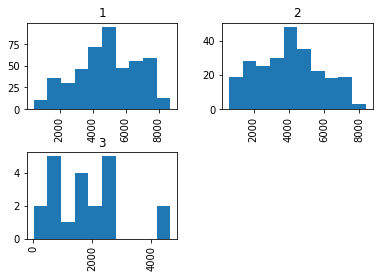

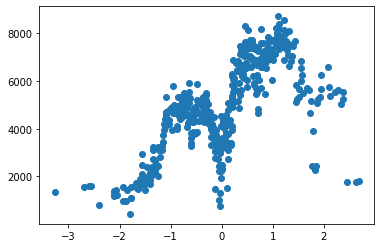

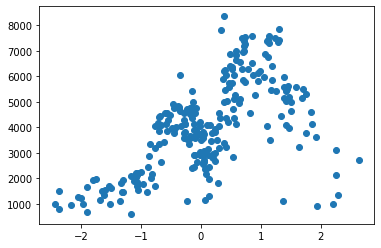

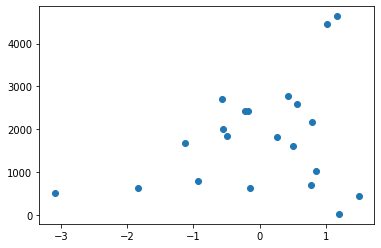

In [ ]:
# descriptive statistics
# and Shapiro-Wilk (S-W) and Kolmogorov–Smirnov (K-S) tests
print('Weather Intensity 1:')
print(stats.describe(rbs_data_day_wi1['cnt']))
print(stats.shapiro(rbs_data_day_wi1['cnt']))
print(stats.kstest(rbs_data_day_wi1['cnt'],'norm'))
print('Weather Intensity 2:')
print(stats.describe(rbs_data_day_wi2['cnt']))
print(stats.shapiro(rbs_data_day_wi2['cnt']))
print(stats.kstest(rbs_data_day_wi2['cnt'],'norm'))
print('Weather Intensity 3:')
print(stats.describe(rbs_data_day_wi3['cnt']))
print(stats.shapiro(rbs_data_day_wi3['cnt']))
print(stats.kstest(rbs_data_day_wi3['cnt'],'norm'))

# histograms
#   separate
rbs_data_day['cnt'].hist(by = rbs_data_day['weathersit'])
plt.show()

# setup Q-Q plots
rbs_data_day_wi1_cnt = rbs_data_day_wi1['cnt']
rbs_data_day_wi2_cnt = rbs_data_day_wi2['cnt']
rbs_data_day_wi3_cnt = rbs_data_day_wi3['cnt']
# sort the values in ascending order
rbs_data_day_wi1_cnt.sort_values()
rbs_data_day_wi2_cnt.sort_values()
rbs_data_day_wi3_cnt.sort_values()
# make a standard normally distributed variable with a matching length
# a mean of 0, and standard deviation of 1 to use as a comparison
norm_wi1 = np.random.normal(0, 1, len(rbs_data_day_wi1_cnt))
norm_wi2 = np.random.normal(0, 1, len(rbs_data_day_wi2_cnt))
norm_wi3 = np.random.normal(0, 1, len(rbs_data_day_wi3_cnt))
# sort the values in ascending order
norm_wi1.sort()
norm_wi2.sort()
norm_wi3.sort()
# plot cnts vs. norms in QQ plots
plt.plot(norm_wi1, rbs_data_day_wi1_cnt, "o")
plt.show()
plt.plot(norm_wi2, rbs_data_day_wi2_cnt, "o")
plt.show()
plt.plot(norm_wi3, rbs_data_day_wi3_cnt, "o")
plt.show()

For all groups, skewness and kurtosis are small, ranging from -0.18 to 0.74 and -0.75 to 0.10, respectively. Both skewness and kurtosis are within the +/-3 guidline limits for making a t-test or ANOVA acceptable for testing the difference between or among groups. If we look at the results of Shapiro-Wilk test, all groups 1 and 2 have p-values less than 0.05, indicating non-normality at the 95% confidence level. In contrast, group 3 has a p-value greater than 0.05, indicating normality, even if does not look normal in the histogram. In the Kolmogorov–Smirnov test, all groups have p-values of 0.0, indicating non-normality as well. The histograms do not look very normal, although 1 and 2 look more normal than 3.  While there is some positive correlation in the Q-Q plots, the data are not convincingly normal. A non-parametric test should be used to assess if there is a significant difference among the groups. The Kruskal-Wallis test will be used:

In [ ]:
# compute medians for reference
print(rbs_data_day_wi1_cnt.median())
print(rbs_data_day_wi2_cnt.median())
print(rbs_data_day_wi3_cnt.median())

# use Kruskal-Wallis test
stats.kruskal(rbs_data_day_wi1_cnt, rbs_data_day_wi2_cnt, rbs_data_day_wi3_cnt)

4844.0
4040.0
1817.0


KruskalResult(statistic=67.17520449165305, pvalue=2.588747451005407e-15)

Because the p-value is < 0.05, we reject the null hypothesis that the 
distributions of rider counts in the weather intensity groups are the same. To specfically consider the difference in medians among the groups, Mood's median test can be used:

In [ ]:
# use Mood's median test
stats.median_test(rbs_data_day_wi1_cnt, rbs_data_day_wi2_cnt, rbs_data_day_wi3_cnt)

(44.08792366696128, 2.6694944140816625e-10, 4548.0, array([[270,  94,   1],
        [193, 153,  20]]))

Because the p-value of 2.7e-10 is < 0.05, we reject the null hypothesis that the medians of rider counts in the different weather intensity groups are the same. By applying the median test to each pair we can see which groups have a significant difference.

In [ ]:
# use Mood's median test
print(stats.median_test(rbs_data_day_wi1_cnt, rbs_data_day_wi2_cnt))
print(stats.median_test(rbs_data_day_wi1_cnt, rbs_data_day_wi3_cnt))
print(stats.median_test(rbs_data_day_wi2_cnt, rbs_data_day_wi3_cnt))

(32.18439852747003, 1.4021213934117455e-08, 4585.5, array([[268,  87],
       [195, 160]]))
(19.911549933148205, 8.110883293780497e-06, 4769.0, array([[242,   0],
       [221,  21]]))
(13.226913437439752, 0.0002759578656697819, 3883.0, array([[132,   2],
       [115,  19]]))


There is a significant difference in the medians is for each pair. There are more riders when the weather is less intense.

####**5. Results**

For each of the hypotheses being investigated, because of the lack of evidence indicating that rider counts are distributed normally, non-parametric tests were used. The Krukal-Wallis and Mood's median tests were used in all cases. The hypotheses were orginally posed in using the term "average," which typically is the mean. However, because of the non-parametric tests used, the hypotheses had to shift to ones with "avearge" replaced with "median." Summarizing the results:

#####**1. Working and Non-Working Days**
>*   The null hypothesis, H₀, that there is no significant difference between the median count of riders on working and non-working days, cannot be rejected.

#####**2. Day of the Week**
>*   The null hypothesis, H₀, that there is no significant difference between the median count of riders on different days of the week, cannot be rejected.

#####**3. Season**
>*   The null hypothesis, H₀, that there is no significant difference between the median daily count of riders in different seasons, is rejected. There is a significant difference between the medians for all pairs of seasons except the pair of spring and autumn.

#####**4. Weather Intensity**
>*   The null hypothesis, H₀, that there is no significant difference between the median daily count of riders at different weather intensity levels, is rejected. There is a significant difference between the medians for all pairs of weather intensity levels. There are more riders when the weather is less intense.

####**6. Discussion and Recommendations**

The median number of riders is not significantly different on working and non-working days or on different days of the week. There is no clear indication based on the above analysis whether the bikes are used more for commuting or for recreation or by DC/MD/VA residents or by visitors. Further research could be done into the hours when the bikes are used and consideration of casual and registered rider counts.

The median daily number of riders is significantly different in different seasons, except for spring and autumn, which have similar temperatures and weather. As expected summer has the most riders and winter the fewest. Revenue clearly has a seasonal cycle. The company may want to promote more riding in the colder and darker times of the year, but this may be a difficult sell, and visibility safety is important. The median daily number of riders decreases with increasing weather intensity. Further reseach could be done into the impacts of temperature and wind speed on the number of riders. Winter or times of intense weather may be good times to remove bikes for maintenance.

The data are for every day over a two-year period, so there is no time sampling bias within that period. However, there could be bias due to the growth of the company in that more stations and bikes likely became available over the two-year period. There is also bias associated with weather intensity, because more intense days are less frequent.